System to solve:
0: x^5 + y^5 -y^2
1: y^3 + x^5*y + x + 1


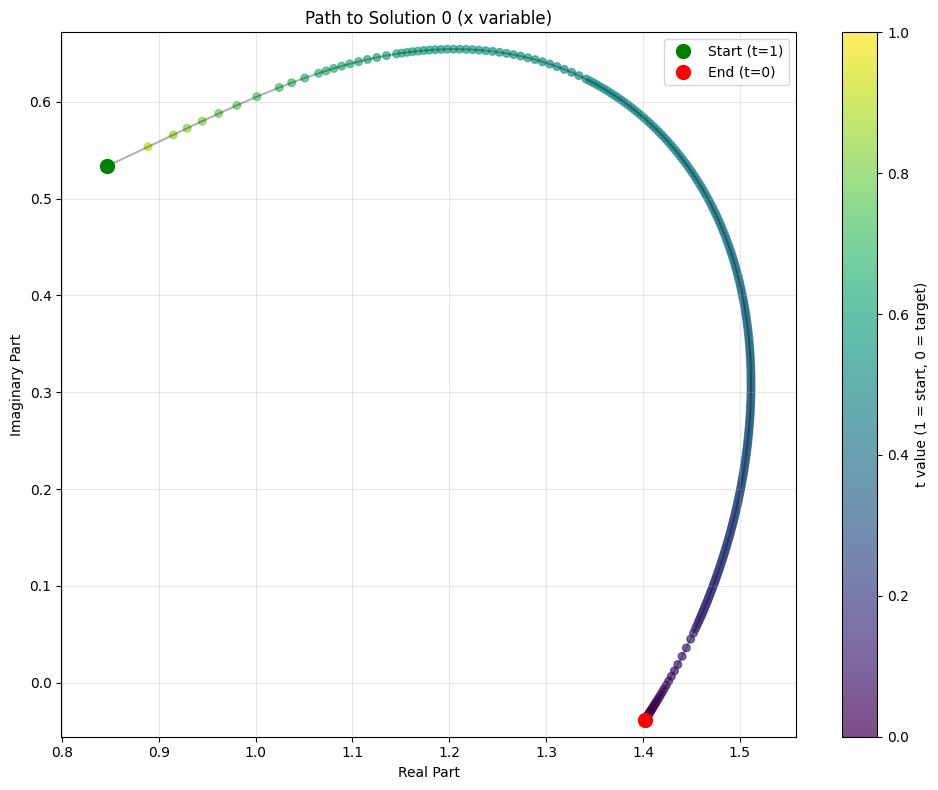


Found 30 solutions:

Solution 1:
Solution (regular, residual=1.12e-12):
  x = 1.0092398 + -0.7913573j
  y = 1.4019684 + -0.038367584j

Solution 2:
Solution (regular, residual=4.43e-13):
  x = 1.0092398 + 0.7913573j
  y = 1.4019684 + 0.038367584j

Solution 3:
Solution (regular, residual=1.52e-12):
  x = -0.46531168 + 1.099522j
  y = 1.3263758 + 0.079722262j

Solution 4:
Solution (regular, residual=1.06e-12):
  x = -1.0840893
  y = 1.250833

Solution 5:
Solution (regular, residual=4.40e-12):
  x = -0.58335571 + -0.70545554j
  y = 0.52577021 + 0.48428303j

Solution 6:
Solution (regular, residual=8.35e-14):
  x = 0.63990327 + -0.8380732j
  y = 0.53493357 + 0.70503596j

Solution 7:
Solution (regular, residual=1.36e-12):
  x = 1.2604022 + 0.28433029j
  y = -0.71681765 + 1.215218j

Solution 8:
Solution (regular, residual=2.94e-13):
  x = 0.96063945 + 0.47572731j
  y = 0.40227411 + 0.80972456j

Solution 9:
Solution (regular, residual=2.59e-12):
  x = -0.24645994 + 0.94666642j
  y = 0.21433572

In [8]:
from pycontinuum import PolynomialSystem, solve, polyvar
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Define variables
x, y = polyvar('x', 'y')

# 2. Define equations
equation1 = x**5 + y**5 - y**2
equation2 = y**3 + x**5*y + x + 1


# 3. Create the polynomial system
system = PolynomialSystem([equation1, equation2])
print("System to solve:")
print(system)

# 4. Solve the system with path tracking
solutions = solve(system, store_paths=True)

# Visualize a solution path
if solutions[0].path_points:
    from pycontinuum.visualization import plot_path
    fig = plot_path(solutions[0].path_points, var_idx=0, 
                  title=f"Path to Solution 0 (x variable)")
    plt.show()

# 5. Display results
print(f"\nFound {len(solutions)} solutions:")
for i, sol in enumerate(solutions):
    print(f"\nSolution {i+1}:")
    print(sol)

# 6. Filter real solutions
real_solutions = solutions.filter(real=True)
print(f"\nReal solutions: {len(real_solutions)}")
print(real_solutions)

In [2]:
from pycontinuum import polyvar, PolynomialSystem, solve
import numpy as np
import matplotlib.pyplot as plt

# Create a simple polynomial system
x, y = polyvar('x', 'y')

# Simple system with a few solutions
equation1 = x**2 + y**2 - 1  # Circle
equation2 = y - x**2      # Parabola

system = PolynomialSystem([equation1, equation2])
print("System to solve:")
print(system)

# Solve the system with path tracking
solutions = solve(system)

# Visualize solution paths using the library's built-in visualization
if solutions[0].path_points:
    from pycontinuum.visualization import plot_path
    
    # Plot path for the first solution (x variable)
    fig1 = plot_path(solutions[0].path_points, var_idx=0, 
                    title="Path to Solution 0 (x variable)")
    plt.show()
    
    # Plot path for the first solution (y variable)
    fig2 = plot_path(solutions[0].path_points, var_idx=1, 
                    title="Path to Solution 0 (y variable)")
    plt.show()

# Print real solutions
print("\nReal solutions:")
print(solutions.filter(real=True))

System to solve:
0: x^2 + y^2 -1
1: y -x^2

Real solutions:
SolutionSet: 2 solutions (2 real, 0 singular)
Tracked 4 paths, found 2 distinct solutions
Solve time: 1.82 seconds

Solution (regular, residual=5.15e-16):
  x = 0.78615138
  y = 0.61803399

Solution (regular, residual=5.15e-16):
  x = -0.78615138
  y = 0.61803399


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pycontinuum import polyvar, Polynomial, PolynomialSystem, solve

# Create a better test system for singularity
def create_better_singular_system():
    x, y = polyvar('x', 'y')
    
    f1 = x**2 + y**2 - 1
    f2 = y - x
    
    system = PolynomialSystem([f1, f2])
    return system, (x, y)

# Create our improved test system
system, (x, y) = create_better_singular_system()
print("Polynomial System:")
print(system)
print(f"Expected singular solution at x=1, y=1 (multiplicity 2)")

# Add debugging to the endgame implementation 
# Print statements in endgame.py's track_loop function can help see what's happening

# Solve with both methods
print("\n=== Solving WITHOUT endgame ===")
result_without_endgame = solve(system, use_endgame=False, verbose=True, tol=1e-8)
print(result_without_endgame)

print("\n=== Solving WITH endgame ===")
# Lower the endgame_start threshold to start endgame earlier
result_with_endgame = solve(system, use_endgame=True, verbose=True, tol=1e-8)
print(result_with_endgame)

# Analyze results
print("\n=== Solution Analysis ===")
print("Without endgame:")
for i, sol in enumerate(result_without_endgame):
    print(f"Solution {i+1}: x = {sol.values[x]:.8f}, y = {sol.values[y]:.8f}")
    print(f"  Singular: {sol.is_singular}, Residual: {sol.residual:.2e}")

print("\nWith endgame:")
for i, sol in enumerate(result_with_endgame):
    print(f"Solution {i+1}: x = {sol.values[x]:.8f}, y = {sol.values[y]:.8f}")
    print(f"  Singular: {sol.is_singular}, Residual: {sol.residual:.2e}")
    if hasattr(sol, 'winding_number'):
        print(f"  Winding number: {sol.winding_number}")

Polynomial System:
0: x^2
1: y^2
Expected singular solution at x=1, y=1 (multiplicity 2)

=== Solving WITHOUT endgame ===


TypeError: 'dict' object is not callable